In [25]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from src.datasets.dataset import Dataset
from xgboost import plot_importance
from src.constant import *

In [26]:
dataset = Dataset()

In [27]:
MODEL_NAME = "xgb_f_dataset.json"

DATASET_NAME = "f_dataset"
DATASET = f"{DATASET_NAME}.feather"
MODEL_NAME = f"xgb_{DATASET_NAME}.json"

In [30]:
base_path = dataset.get_xgboost_model_folder()
model = xgb.XGBRanker()
model.load_model(base_path/MODEL_NAME)

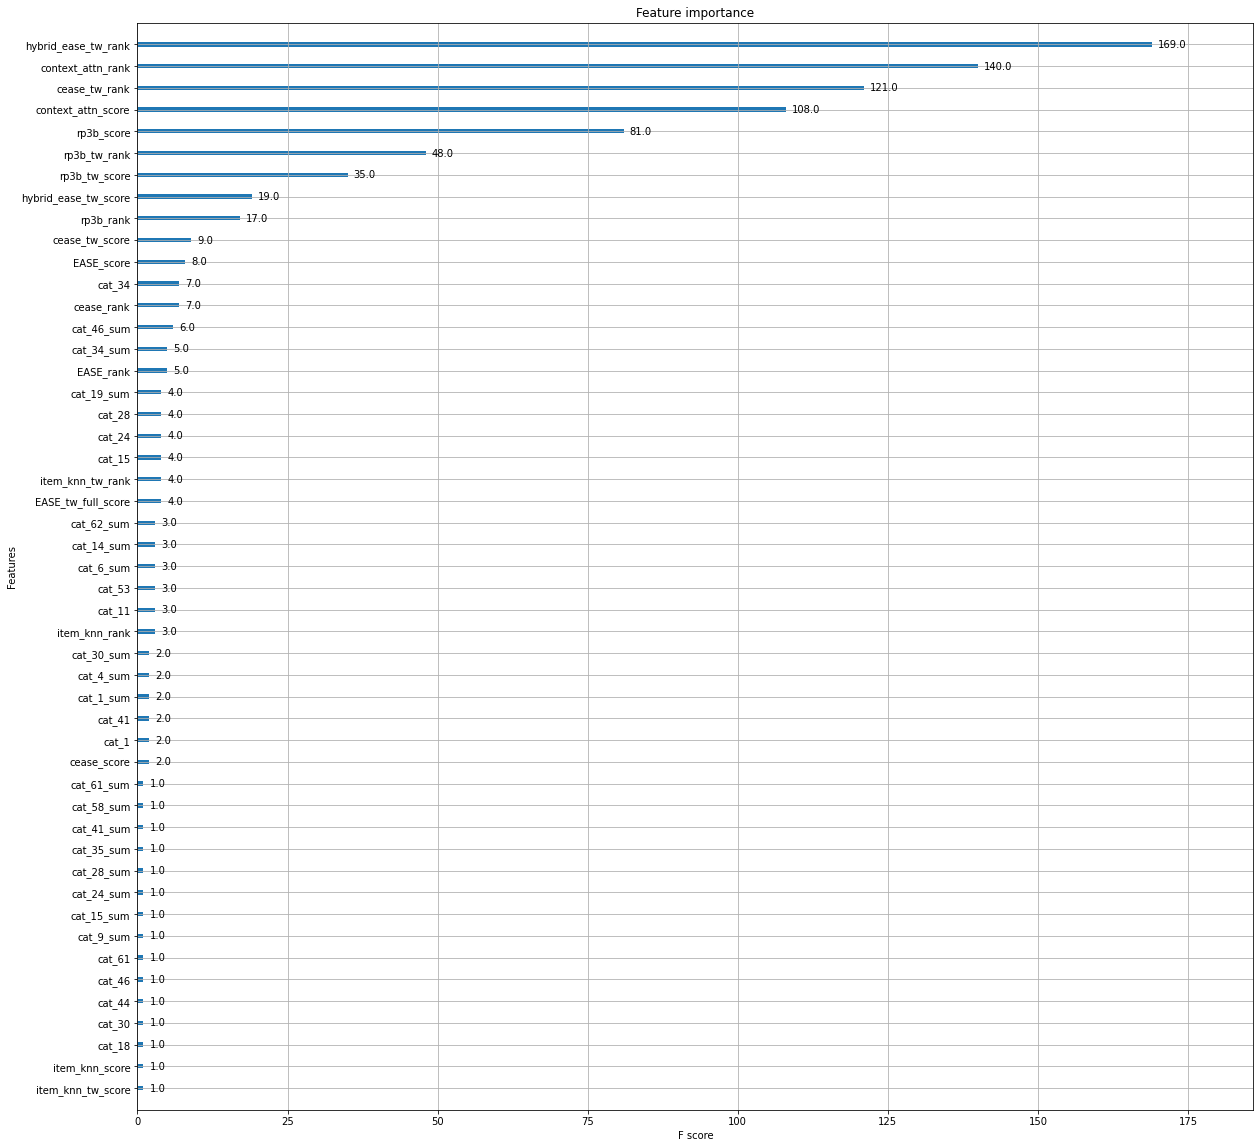

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [6]:
from pathlib import Path
base_path = dataset.get_leaderboard_xgboost_dataset_folder()
#base_path = dataset.get_final_xgboost_dataset_folder()
path = base_path / Path(f"{DATASET_NAME}.feather")
features_df = pd.read_feather(path)

In [7]:
sess_article_df = features_df[[SESS_ID, ITEM_ID]].copy()
X = features_df.drop([SESS_ID, ITEM_ID], axis=1)

In [8]:
sess_article_df.head()

,session_id,item_id
0,26,2735
1,26,1173
2,26,1623
3,26,13759
4,26,5242


In [9]:
X

,EASE_tw_full_score,EASE_tw_full_rank,EASE_score,EASE_rank,cease_tw_score,cease_tw_rank,cease_score,cease_rank,hybrid_ease_tw_score,hybrid_ease_tw_rank,rp3b_tw_score,rp3b_tw_rank,rp3b_score,rp3b_rank,item_knn_tw_score,item_knn_tw_rank,item_knn_score,item_knn_rank,context_attn_score,context_attn_rank
0,0.040875,1.0,0.040778,1.0,0.001201,2.0,0.001201,2.0,0.013074,1.0,0.073257,1.0,0.073257,1.0,0.203770,1.0,0.203770,1.0,0.892877,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005039,73.0,0.005039,73.0,0.015205,85.0,0.015205,85.0,0.726099,54.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005030,74.0,0.005030,74.0,0.021538,54.0,0.021538,54.0,0.712276,99.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004801,76.0,0.004801,76.0,0.013336,97.0,0.013336,97.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004704,78.0,0.004704,78.0,0.016125,82.0,0.016125,82.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15311886,NaN,NaN,NaN,NaN,0.002048,31.0,0.004614,27.0,0.001433,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15311887,NaN,NaN,NaN,NaN,0.002067,27.0,0.004559,28.0,0.001578,44.0,NaN,NaN,0.006387,70.0,NaN,NaN,NaN,NaN,0.728638,18.0
15311888,NaN,NaN,NaN,NaN,0.002067,26.0,0.004559,29.0,0.001980,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.704674,36.0
15311889,NaN,NaN,NaN,NaN,0.001662,58.0,0.002931,95.0,0.001153,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/RecSysChallenge2022/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/RecSysChallenge2022/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [11]:
model.best_ntree_limit

169

In [12]:
sess_article_df["predicted_score"] = y_pred

In [13]:
sess_article_df

,session_id,item_id,predicted_score
0,26,2735,3.532275
1,26,1173,-1.404118
2,26,1623,-1.670649
3,26,13759,-2.042893
4,26,5242,-2.027793
...,...,...,...
15311886,4439757,14395,-1.103996
15311887,4439757,21149,-0.220307
15311888,4439757,17242,-0.266004
15311889,4439757,20054,-1.642909


In [14]:
sorted_scores = sess_article_df.sort_values([SESS_ID, "predicted_score"], ascending=[True, False])

In [15]:
sorted_scores.head(20)

,session_id,item_id,predicted_score
0,26,2735,3.532275
166,26,4520,2.488438
237,26,23496,1.350778
235,26,6200,1.316486
230,26,21252,1.254544
232,26,1843,1.091530
192,26,23252,0.919957
231,26,22360,0.898498
263,26,23088,0.833774
234,26,5550,0.591654


In [16]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [17]:
cutoff = sorted_scores_index.groupby(SESS_ID).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+100))
    i=i+cut

In [18]:
cutoff.mean()

306.23782

In [19]:
final_df = sorted_scores_index.loc[filter_indices]

In [20]:
final_df

,session_id,item_id,predicted_score
0,26,2735,3.532275
1,26,4520,2.488438
2,26,23496,1.350778
3,26,6200,1.316486
4,26,21252,1.254544
...,...,...,...
15311613,4439757,15621,-1.699083
15311614,4439757,10950,-1.708827
15311615,4439757,16259,-1.728380
15311616,4439757,5968,-1.728380


In [21]:
rank= np.tile(np.arange(1,101), final_df[SESS_ID].nunique())

In [22]:
final_df["rank"] = rank

In [23]:
final_df

,session_id,item_id,predicted_score,rank
0,26,2735,3.532275,1
1,26,4520,2.488438,2
2,26,23496,1.350778,3
3,26,6200,1.316486,4
4,26,21252,1.254544,5
...,...,...,...,...
15311613,4439757,15621,-1.699083,96
15311614,4439757,10950,-1.708827,97
15311615,4439757,16259,-1.728380,98
15311616,4439757,5968,-1.728380,99


In [24]:
dataset.create_submission(final_df, sub_name="xgb_final")

Submission with name: xgb_final created succesfully!


In [ ]:
compute_mrr(final_df, val_test_label)